In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans  

In [25]:
image_path = "../output-videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

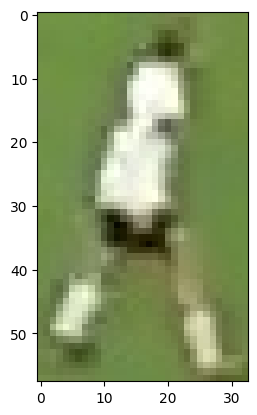

In [26]:
plt.imshow(image)
plt.show()

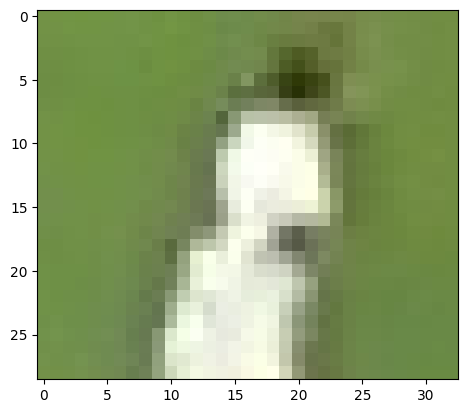

In [27]:
top_half_image = image[:image.shape[0]//2, :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

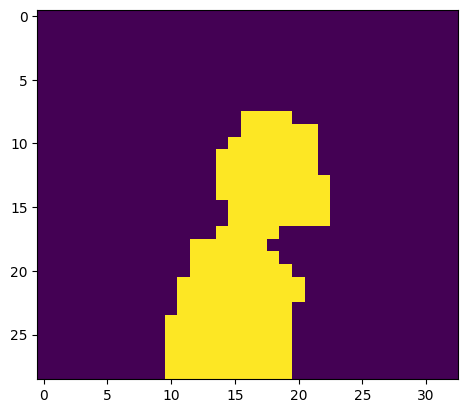

In [28]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape((-1, 3))

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

# Reshape the labels back to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()


In [29]:
corner_clusters = [clustered_image[0 , 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [30]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [31]:
kmeans.cluster_centers_[player_cluster]

array([228.77325581, 233.46511628, 213.80232558])